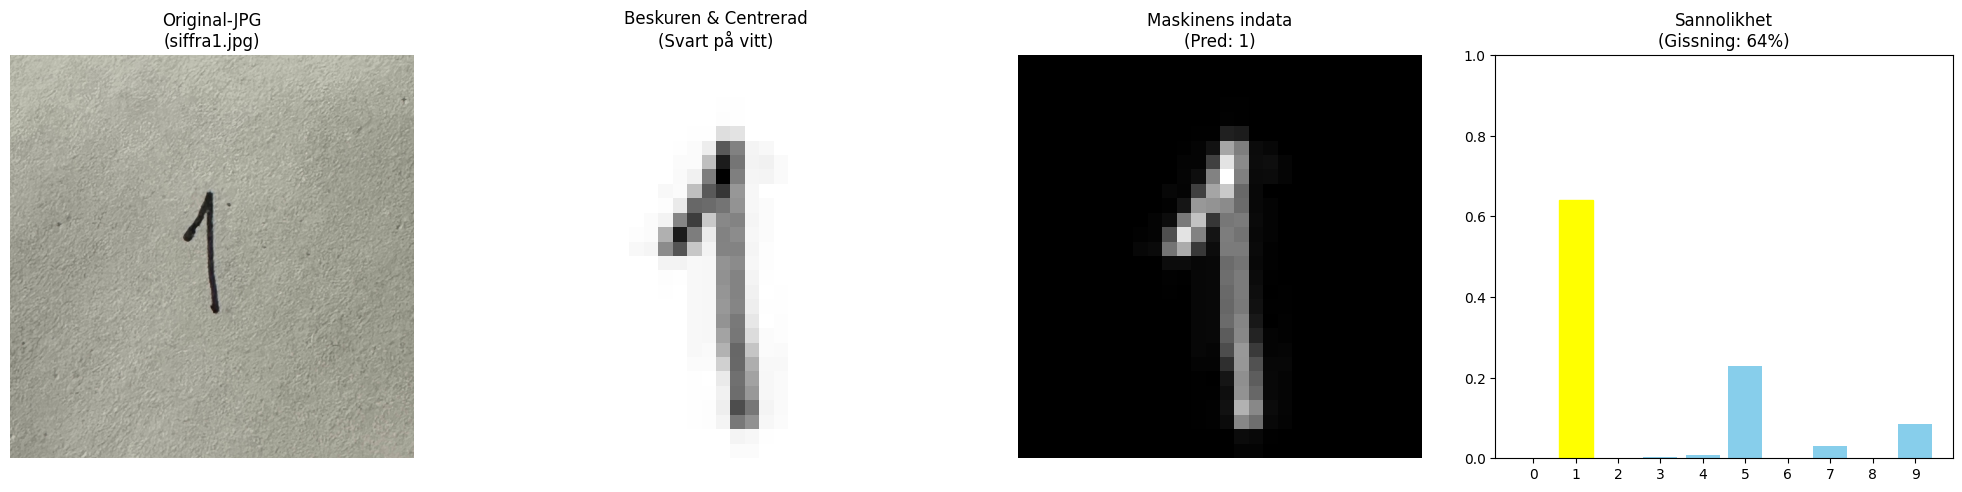

>>> Analys klar för siffra1.jpg: Prediktion 1 (64.2%)


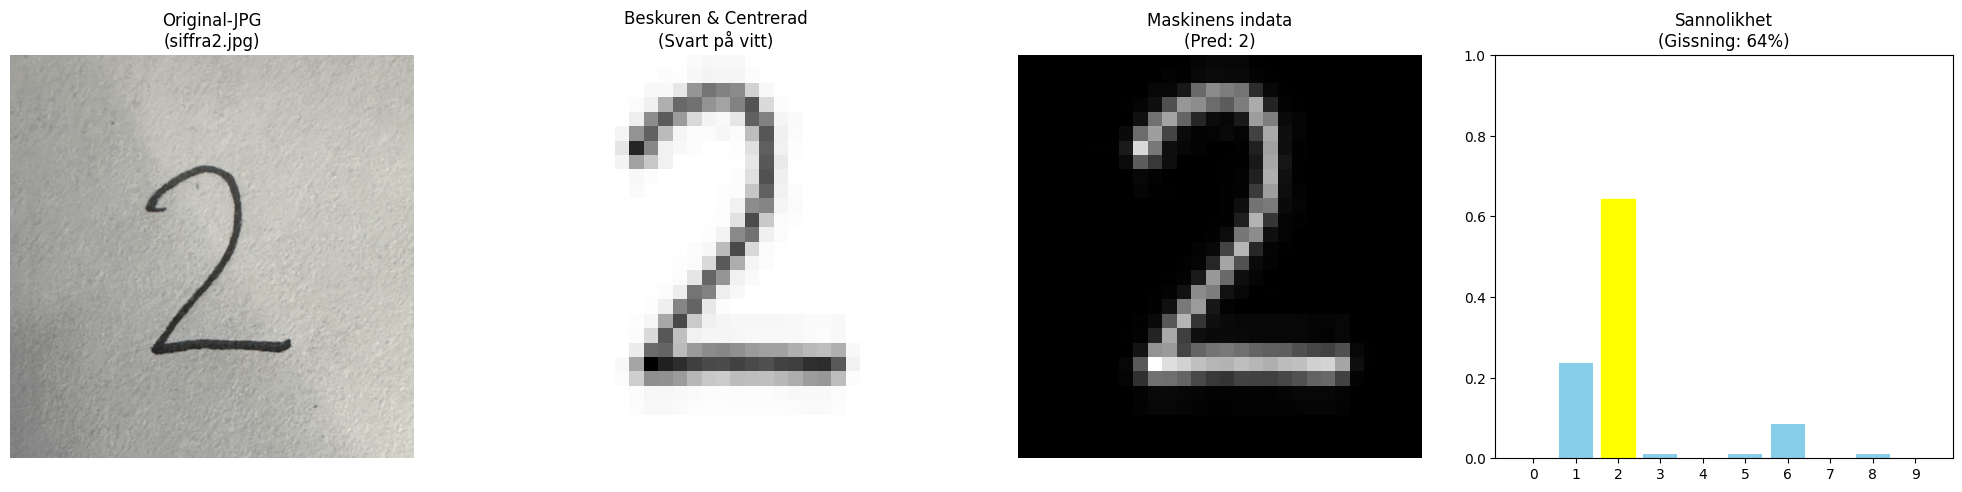

>>> Analys klar för siffra2.jpg: Prediktion 2 (64.4%)


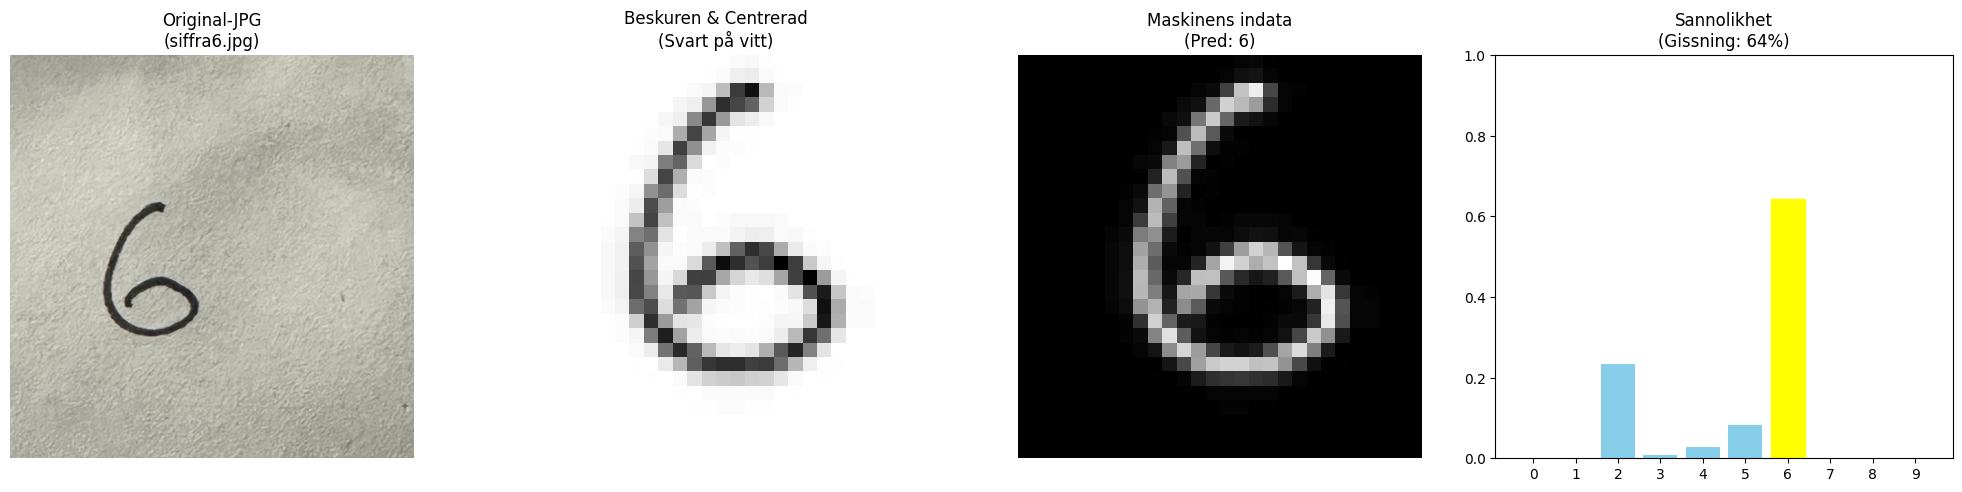

>>> Analys klar för siffra6.jpg: Prediktion 6 (64.4%)


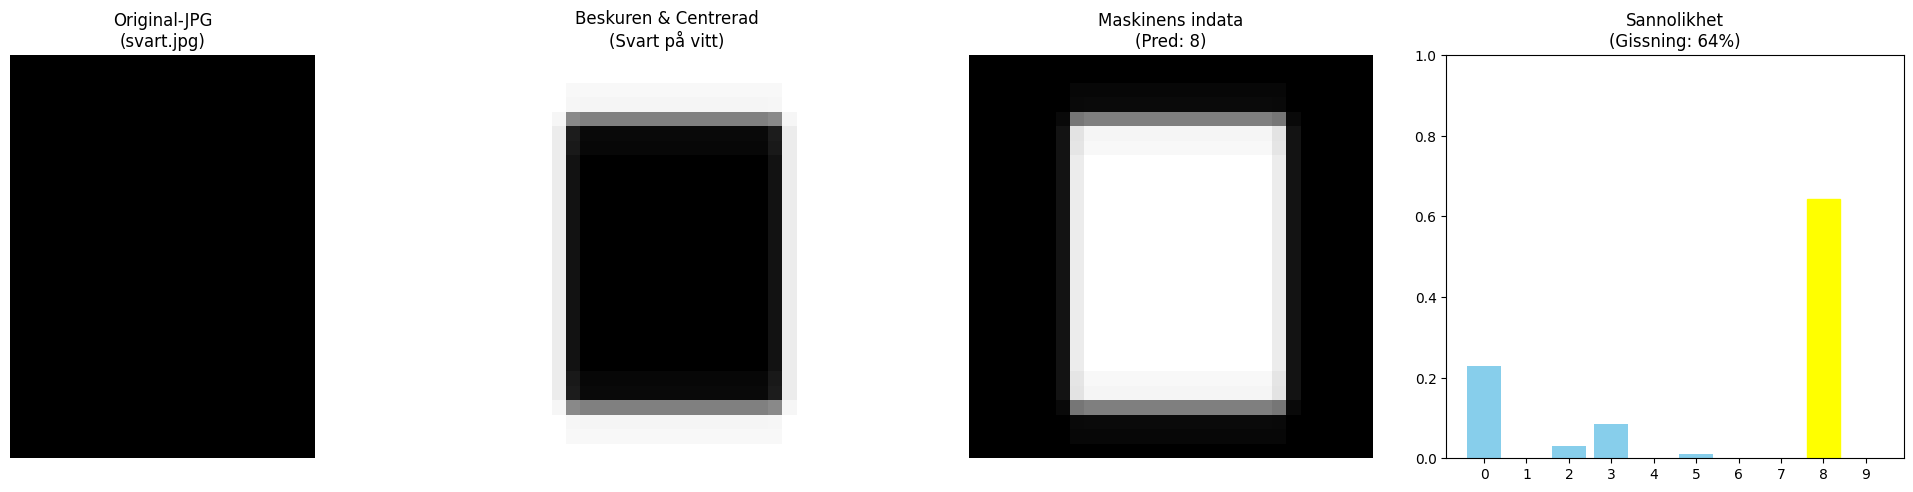

>>> Analys klar för svart.jpg: Prediktion 8 (64.3%)


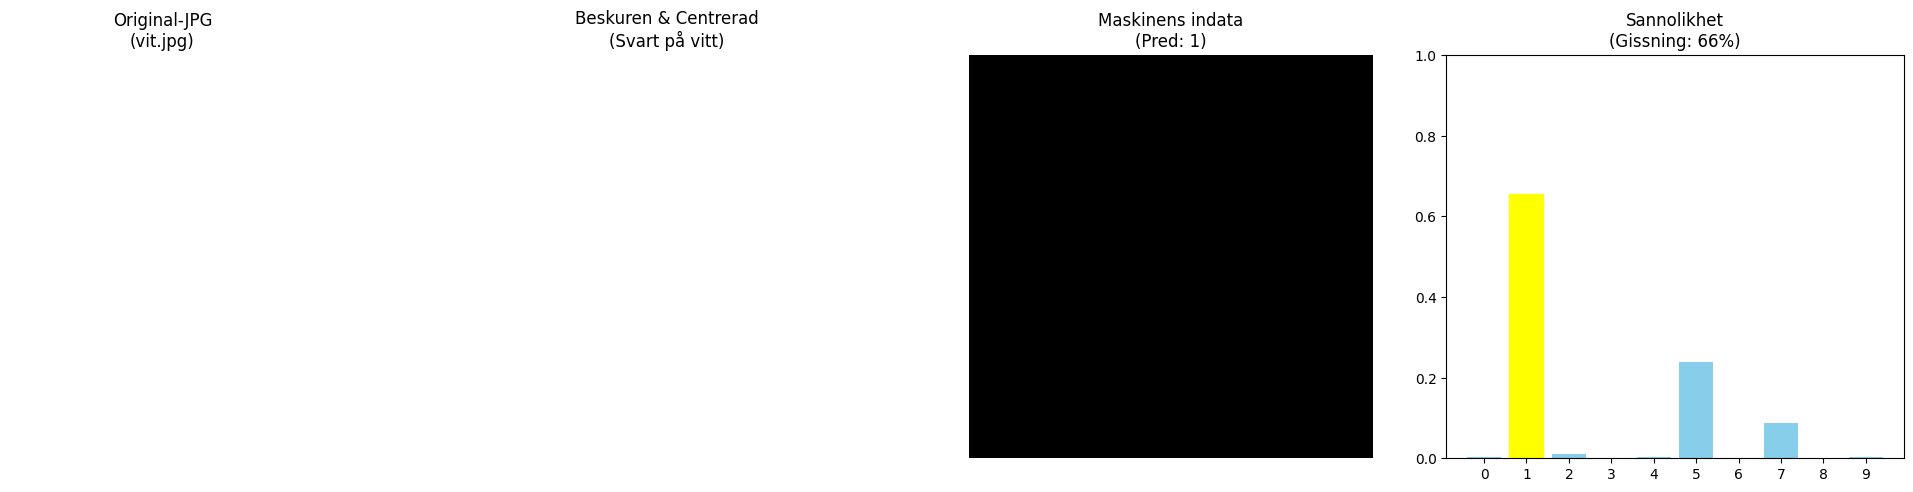

>>> Analys klar för vit.jpg: Prediktion 1 (65.5%)


In [1]:
import importlib
import preprocess
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from PIL import Image
from sklearn.datasets import fetch_openml

# Tvingad omladdning av senaste preprocessor-versionen (hade lite cache-problem)
importlib.reload(preprocess)
from preprocess import preprocess_image

model = load("mnist_model_final_svc.joblib")

# Lista på testbilder
image_files = ["siffra1.jpg", "siffra2.jpg", "siffra6.jpg", "svart.jpg", "vit.jpg"]

for img_path in image_files:
    try:
        
        X, img_28 = preprocess_image(img_path)
        
        # Jag vill ha procentuella sannolikheter och fick gå en liten omväg
        scores = model.decision_function(X)[0]
        exp_scores = np.exp(scores - np.max(scores))
        probabilities = exp_scores / exp_scores.sum()
        
        pred = np.argmax(probabilities)
        conf = probabilities[pred]

        # Det här tyckte jag blev ganska snyggt upplagt. Tydligt och bra. 
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        
        # Kolumn 1: Originalet
        original = Image.open(img_path)
        ax[0].imshow(original)
        ax[0].set_title(f"Original-JPG\n({img_path})")
        
        # Kolumn 2: Beskuren & Centrerad (Mänsklig vy)
        ax[1].imshow(img_28, cmap="binary")
        ax[1].set_title("Beskuren & Centrerad\n(Svart på vitt)")
        
        # Kolumn 3: Maskinens indata (Vitt på svart)
        ax[2].imshow(img_28, cmap="gray")
        ax[2].set_title(f"Maskinens indata\n(Pred: {pred})")
        
        # Kolumn 4: Sannolikhetsfördelning
        bars = ax[3].bar(range(10), probabilities, color='skyblue')
        bars[pred].set_color('yellow') # Markera vinnaren
        ax[3].set_title(f"Sannolikhet\n(Gissning: {conf:.0%})")
        ax[3].set_xticks(range(10))
        ax[3].set_ylim(0, 1.0) 

        for i in range(3): ax[i].axis("off")
        plt.tight_layout()
        plt.show()

        print(f">>> Analys klar för {img_path}: Prediktion {pred} ({conf:.1%})")

    except Exception as e:
        print(f"Den här bilden gick inte att bearbeta {img_path}: {e}")